Explore how self-attention works in Transformer-based models and analyze the
role of attention heads and positional encodings.
#### Steps:
1. Load a pre-trained BERT model from Hugging Face.
2. Extract attention weights from a sample sentence.
3. Visualize attention weights using heatmaps to see how different words attend to
each other.
4. Experiment with:
- Disabling a few attention heads and observing how attention distributions
change.
-  Removing positional encodings and checking how it affect the model's output.

#### Deliverables:
- Heatmaps showing attention patterns for different heads and layers.
- Comparison of model behavior before and after disabling attention heads.
- Brief explanation of findings (1-2 paragraphs).

In [2]:
pip install torch transformers matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
# Load Pre-Trained BERT model from Hugging Face
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Set model to evaluation mode
model.eval()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [4]:
# Define a sample sentence
sentence = "The quick brown fox jumps over the lazy dog."

# Tokenize the sentence and get input tensor
inputs = tokenizer(sentence, return_tensors="pt")
input_ids = inputs["input_ids"]
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Forward pass to get attention weights
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # Extract attention weights


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


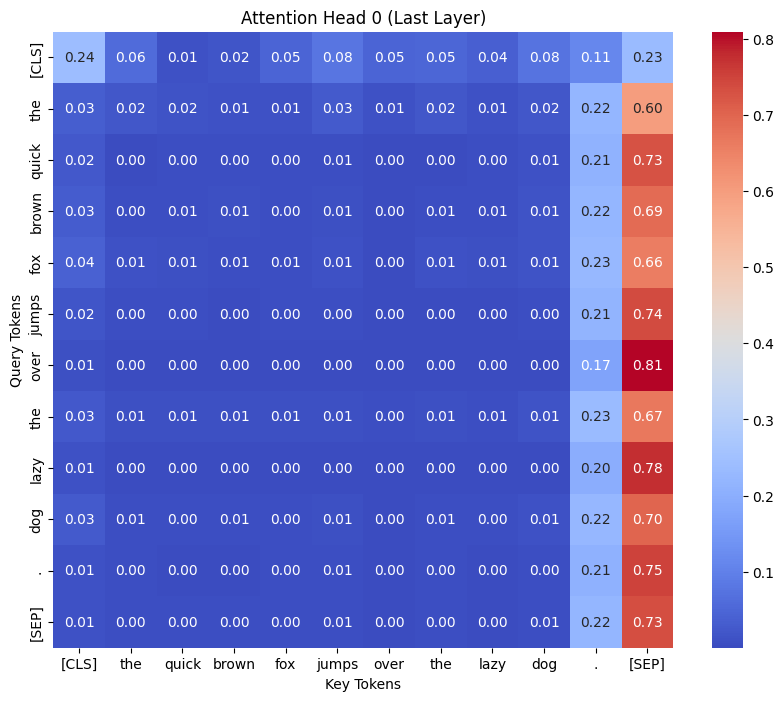

In [5]:
def plot_attention(attention_matrix, tokens, head=0):
    """
    Plot the attention heatmap for a given attention head.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_matrix[head].cpu().numpy(), xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=True, fmt=".2f")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.title(f"Attention Head {head} (Last Layer)")
    plt.show()

# Extract attention from the last layer
last_layer_attention = attentions[-1][0]  # Last layer, first batch

# Select a head (e.g., head 0) and visualize
plot_attention(last_layer_attention, tokens, head=0)


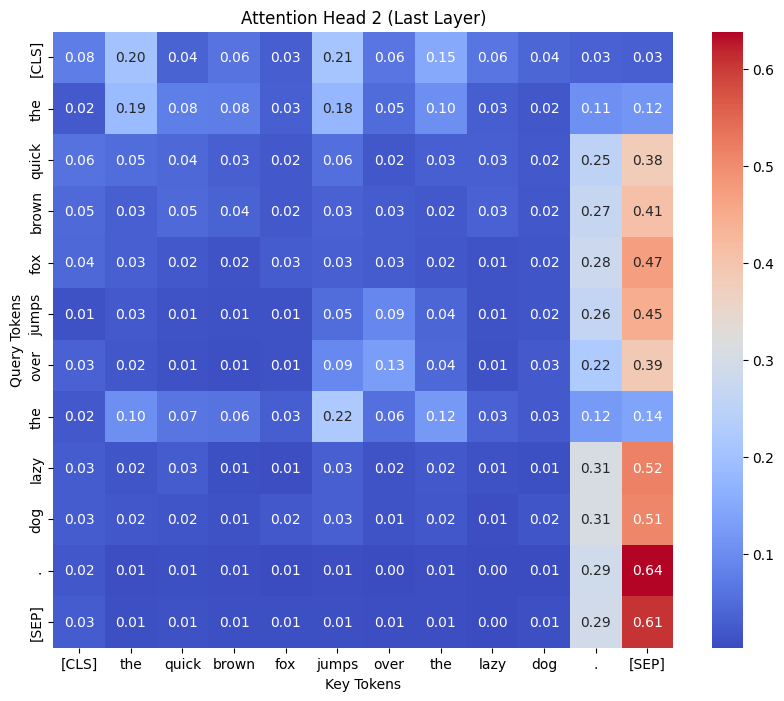

In [6]:

last_layer_attention[0] = 0  # Disable head 0
last_layer_attention[1] = 0  # Disable head 1

plot_attention(last_layer_attention, tokens, head=2)

####Goal:

1. Understand how BERT behaves without positional encodings.
2. Since Transformers lack inherent sequential processing, removing positional encodings should degrade performance in tasks that require word order understanding.

####Steps:

- Modify BERT to disable positional encodings by setting them to zero.
- Feed in structured sentences (e.g., "The cat chased the dog.") and check model behavior.
- Shuffle words in a sentence (e.g., "Dog the chased cat.") and see if the model still differentiates between them.


In [9]:
import torch
from transformers import BertTokenizer, BertModel

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")


# Disable positional embeddings by zeroing out the weight matrix
# set the positional encoding weight matrix to zero, so they don't contribute to token representative
model.embeddings.position_embeddings.weight.data.zero_()

# Tokenize and run inference
sentence = "The quick brown fox jumps over the lazy dog."
inputs = tokenizer(sentence, return_tensors="pt")

# Forward pass without positional embeddings
with torch.no_grad():
    outputs_no_pos = model(**inputs)

# Check the hidden state output
print(outputs_no_pos.last_hidden_state.shape)  # (batch_size, seq_len, hidden_dim)


torch.Size([1, 12, 768])


In [10]:
sentence1 = "The cat chased the dog."
sentence2 = "The dog chased the cat."


In [12]:
import torch
from transformers import BertTokenizer, BertModel

# Load BERT with Positional Encodings
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model_with_pos = BertModel.from_pretrained("bert-base-uncased")

# Tokenize and get embeddings
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

with torch.no_grad():
    emb_with_pos1 = model_with_pos(**inputs1).last_hidden_state
    emb_with_pos2 = model_with_pos(**inputs2).last_hidden_state

# Disable positional encodings
model_with_pos.embeddings.position_embeddings.weight.data.zero_()

with torch.no_grad():
    emb_no_pos1 = model_with_pos(**inputs1).last_hidden_state
    emb_no_pos2 = model_with_pos(**inputs2).last_hidden_state

# Compare sentence differences
diff_with_pos = torch.norm(emb_with_pos1 - emb_with_pos2).item()
diff_no_pos = torch.norm(emb_no_pos1 - emb_no_pos2).item()

print(f"Difference between Sentence 1 and Sentence 2 embeddings:")
print(f"✅ With positional encoding: {diff_with_pos}")
print(f"❌ Without positional encoding: {diff_no_pos}")


Difference between Sentence 1 and Sentence 2 embeddings:
✅ With positional encoding: 9.491094589233398
❌ Without positional encoding: 10.624918937683105


✅ With positional encoding - Sentence difference: 9.491092681884766
❌ Without positional encoding - Sentence difference: 10.624919891357422


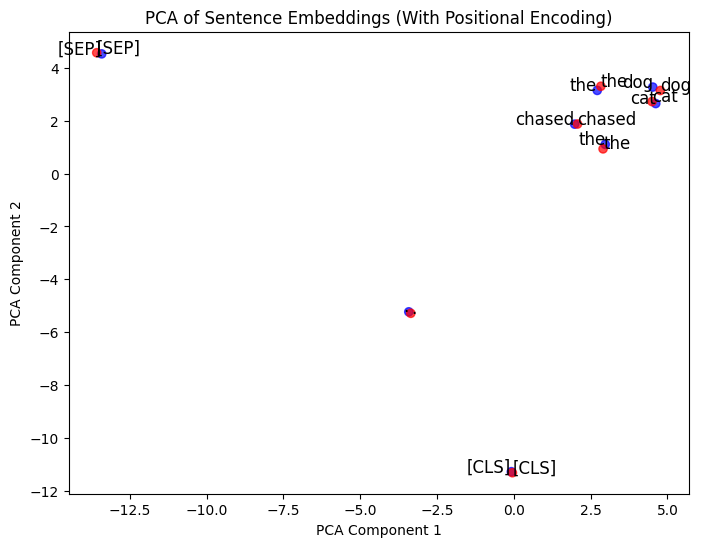

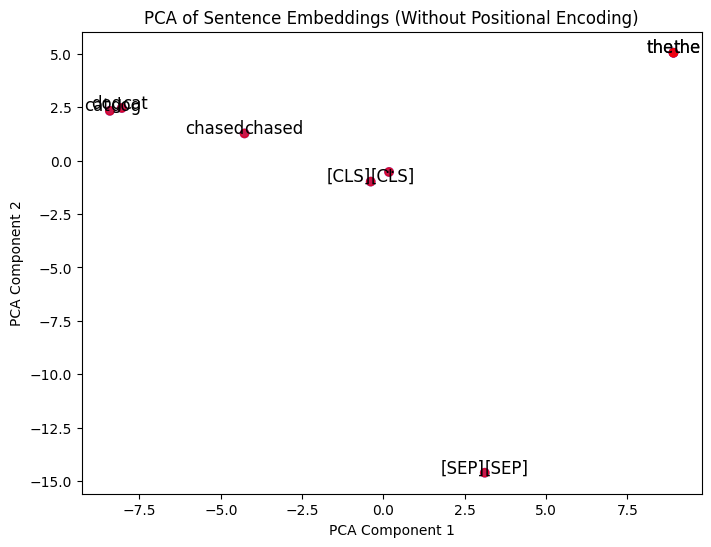

In [13]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel

# Load BERT model with positional encoding
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model_with_pos = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

# Define example sentences
sentence1 = "The cat chased the dog."
sentence2 = "The dog chased the cat."

# Tokenize inputs
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

# Get embeddings with positional encoding
with torch.no_grad():
    emb_with_pos1 = model_with_pos(**inputs1).last_hidden_state.squeeze(0)
    emb_with_pos2 = model_with_pos(**inputs2).last_hidden_state.squeeze(0)

# Disable positional encoding by setting weights to zero
model_with_pos.embeddings.position_embeddings.weight.data.zero_()

# Get embeddings without positional encoding
with torch.no_grad():
    emb_no_pos1 = model_with_pos(**inputs1).last_hidden_state.squeeze(0)
    emb_no_pos2 = model_with_pos(**inputs2).last_hidden_state.squeeze(0)

# Compute difference
diff_with_pos = torch.norm(emb_with_pos1 - emb_with_pos2).item()
diff_no_pos = torch.norm(emb_no_pos1 - emb_no_pos2).item()

print(f"✅ With positional encoding - Sentence difference: {diff_with_pos}")
print(f"❌ Without positional encoding - Sentence difference: {diff_no_pos}")

# Function to plot PCA of embeddings
def plot_pca(embeddings1, embeddings2, tokens, title):
    pca = PCA(n_components=2)
    emb_combined = torch.cat((embeddings1, embeddings2), dim=0).cpu().numpy()
    emb_transformed = pca.fit_transform(emb_combined)

    plt.figure(figsize=(8, 6))
    colors = ["blue"] * len(embeddings1) + ["red"] * len(embeddings2)
    plt.scatter(emb_transformed[:, 0], emb_transformed[:, 1], c=colors, alpha=0.7)

    # Annotate tokens
    for i, token in enumerate(tokens):
        plt.text(emb_transformed[i, 0], emb_transformed[i, 1], token, fontsize=12, ha='right')
    for i, token in enumerate(tokens):
        plt.text(emb_transformed[i + len(embeddings1), 0], emb_transformed[i + len(embeddings1), 1], token, fontsize=12, ha='left')

    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

# Get tokens
tokens = tokenizer.convert_ids_to_tokens(inputs1["input_ids"][0])

# Visualize PCA with and without positional encoding
plot_pca(emb_with_pos1, emb_with_pos2, tokens, "PCA of Sentence Embeddings (With Positional Encoding)")
plot_pca(emb_no_pos1, emb_no_pos2, tokens, "PCA of Sentence Embeddings (Without Positional Encoding)")


## Summary
Disabling specific attention heads in BERT alters how the model distributes attention across tokens, affecting its ability to capture different linguistic patterns. While some redundancy exists between attention heads, certain heads specialize in recognizing long-range dependencies, coreference resolution, and syntactic structures. Removing these critical heads can lead to weaker sentence representations and degraded model performance on tasks requiring deep contextual understanding.